# Course Project: Unsupervised Machine Learning Clustering

### Objective:

The objective of this report is to enhance the predictions of the wine color data set corresponding to the Wine_Quality_Data. From the results obtained, we will be able to analyze the influence and the relation of the different features to determine the wine color. 

### Description of the Data Set and its Attributes

The study data set is the one provided in the course. Among the main attributes of the data can be found those described below.

### Features:

The color of the wine:

* Color 

Chemical properties of wine:
												
* fixed_acidity
* volatile_acidity
* citric_acid
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates
* alcohol

Quality metric of the wine (3 to 9, with highest being better):

* quality 

# Exploratory Data Analisis
### Initial plan for data exploration and actions for data cleaning and feature engineering.

The data is already correct concerning Data Cleaning. However, we will do the corresponding variables transformations to carry out the different models of the adequate tide. Then we will preliminarily analyze the existing correlations between the features, to generate a better understanding of the data set.

#### Data Cleaning and Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Analyzing the data set.

In [3]:
filepath = 'Wine_Quality_Data.csv'
data = pd.read_csv(filepath)
display(data)
print(data.info())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


There is no missing data, since this data set have been previously modified.

In [4]:
print(data['color'].value_counts())
data.describe(include='object')

white    4898
red      1599
Name: color, dtype: int64


,color
count,6497
unique,2
top,white
freq,4898


Since clusastering models have a strong dependence on the distances, it is important to scale the data.

In [5]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
feature_cols = data.columns[:-2]
data[feature_cols] = SC.fit_transform(data[feature_cols])

data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,red
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,red
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,red
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,red
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,red


We are going to analyze in a preliminary way the correlations between features in order to determine multicollinearity.

<AxesSubplot:>

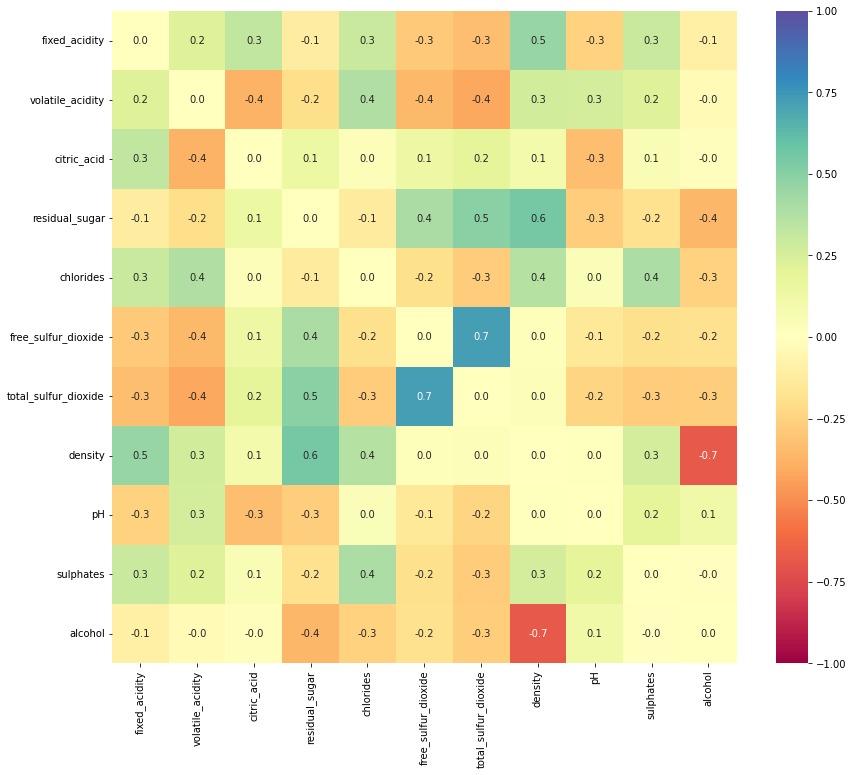

In [6]:
correlation = data[feature_cols].corr()

# Midify the diagonal values 
for x in range(len(feature_cols)):
    correlation .iloc[x,x] = 0.0
    
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")

In [7]:
correlation.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

# Clustering Models

Now we are going to develop the following classification models.

* K-Means 
* Mean-Shift
* Hierarchical Clustering
* DBSCAN

## K-Means

In [8]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=2, random_state=42)
KM = KM.fit(data[feature_cols])

data['KMeans'] = KM.predict(data[feature_cols])
print(f'Inertia: {int(KM.inertia_)}')
print(data[['color','KMeans']].value_counts())
#data[['color','KMeans']].groupby(['color','KMeans']).size().to_frame().rename(columns={0:'number'})

Inertia: 56143
color  KMeans
white  0         4831
red    1         1575
white  1           67
red    0           24
dtype: int64


## Mean-Shift

In [13]:
from sklearn.cluster import MeanShift
for band  in [5,10,15]:
    MS = MeanShift(bandwidth=band)
    MS = MS.fit(data[feature_cols])

    data['MeanShift'] = MS.predict(data[feature_cols])
    print(f'Inertia: {int(KM.inertia_)}')
    print(f'Bandwidth: {band}')
    print(data[['color','MeanShift']].value_counts(), '\n')
    #data[['color','MeanShift']].groupby(['color','MeanShift']).size().to_frame().rename(columns={0:'number'})

Inertia: 56143
Bandwidth: 5
color  MeanShift
white  0            4891
red    0            1556
       1              41
white  1               5
red    2               2
white  3               1
       4               1
dtype: int64 

Inertia: 56143
Bandwidth: 10
color  MeanShift
white  0            4897
red    0            1599
white  1               1
dtype: int64 

Inertia: 56143
Bandwidth: 15
color  MeanShift
white  0            4898
red    0            1599
dtype: int64 



## Hierarchical Agglomerative Clustering

WARD:
color  HAC
white  0      4735
red    1      1578
white  1       163
red    0        21
dtype: int64 

COMPLETE:
color  HAC
white  0      4897
red    0      1599
white  1         1
dtype: int64 

AVERAGE:
color  HAC
white  0      4897
red    0      1599
white  1         1
dtype: int64 

SINGLE:
color  HAC
white  0      4897
red    0      1599
white  1         1
dtype: int64 



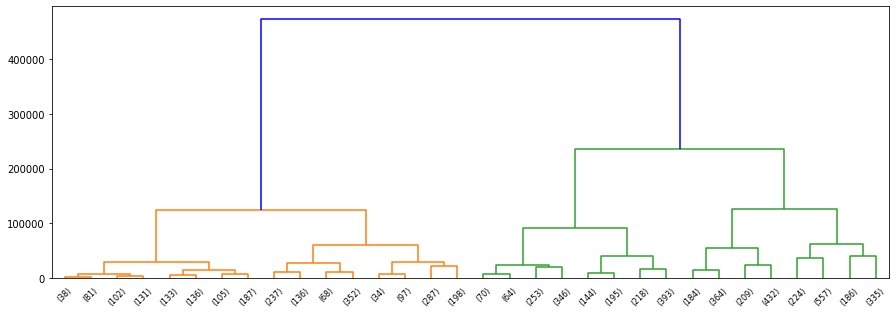

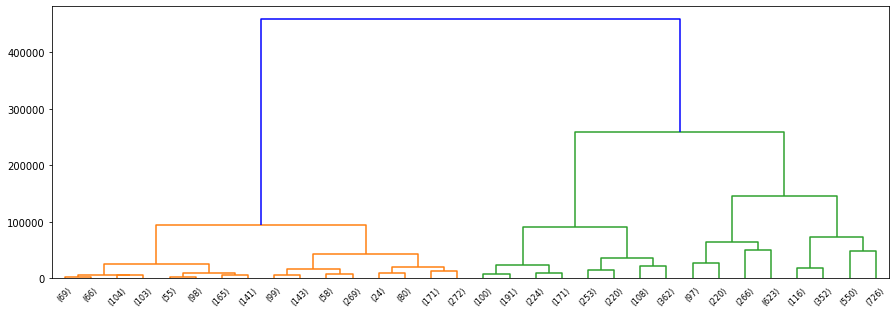

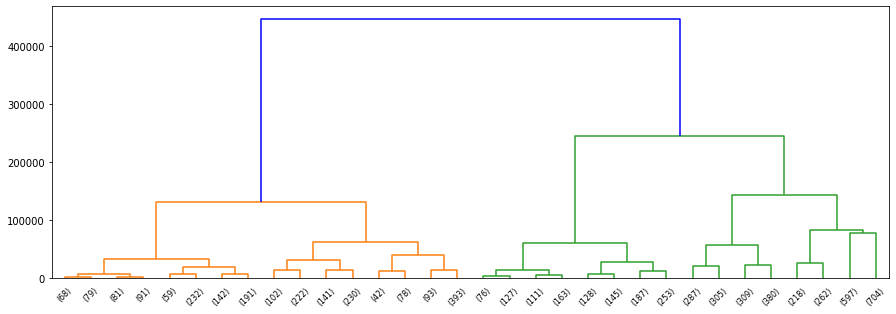

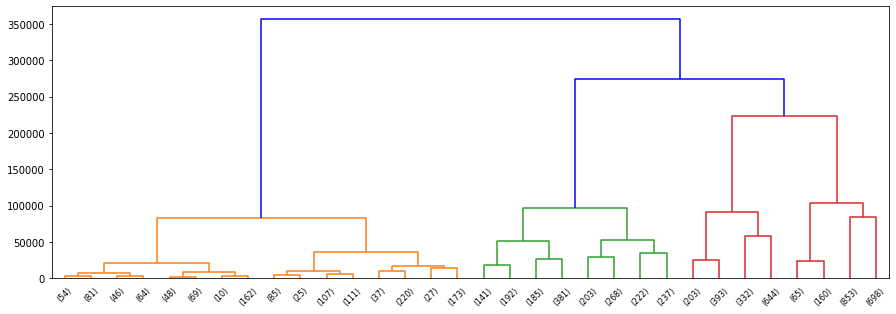

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

distance = ['ward', 'complete', 'average', 'single']
for dist in distance:
    HAC = AgglomerativeClustering(n_clusters=2, linkage=dist, compute_full_tree=True)
    HAC = HAC.fit(data[feature_cols])
    data['HAC'] = HAC.fit_predict(data[feature_cols])
    print(f'{dist.upper()}:')
    print(data[['color','HAC']].value_counts(), '\n')

    # Linkage function
    X = hierarchy.linkage(HAC.children_, method='ward')
    fig, ax = plt.subplots(figsize=(15,5))

    # Dendrogram function
    den = hierarchy.dendrogram(X, orientation='top', 
                            p=4, truncate_mode='level',
                            show_leaf_counts=True, ax=ax,
                            above_threshold_color='blue')

## Density-Based Spatial Clustering of Applications with Noise 

In [14]:
from sklearn.cluster import DBSCAN

epsilon = [5,10,15]
samples = [5]
for eps in epsilon:
    for sam in samples:
        DB = DBSCAN(eps=eps, min_samples=sam)
        DB = DB.fit(data[feature_cols])
        data['DBSCAN']  = DB.labels_

        print(f'Epsilon: {eps}, Samples: {sam}')
        print(data[['color','DBSCAN']].value_counts(), '\n')

Epsilon: 5, Samples: 5
color  DBSCAN
white   0        4896
red     0        1598
white  -1           2
red    -1           1
dtype: int64 

Epsilon: 10, Samples: 5
color  DBSCAN
white   0        4897
red     0        1599
white  -1           1
dtype: int64 

Epsilon: 15, Samples: 5
color  DBSCAN
white  0         4898
red    0         1599
dtype: int64 



# Summary


In summary, the following can be highlighted. 

Regarding the clustering models used:

- K-Means.

With K-Means we can define the amount of clusters that in our example is known (2 clusters), however, it turns out to be imprecise. Categorizing 67 wrong data for white label and 24 wrong data for red label.

- Mean-Shift.

With Mean-Shift, we will perform iterations of the bandwidth to obtain the number of clusters and the accuracy of the prediction desired. We can see that for bandwidth = 5 many more clusters than desired are obtained, for bandwidth = 10 the number of desired clusters and a good level of precision in the predictions are obtained, and for bandwidth = 15 the number of desired clusters and perfect predictions are obtained.

- Hierarchical Agglomerative Clustering.

With Hierarchical Agglomerative Clustering, as in K-Means, we can define the number of clusters, but in this case, we perform iterations with the methods to measure the distance between clusters, and the linkage types. We can then observe that for the ward distance large errors are obtained were 163 data for the white label and 21 data for the red label were wrong categorized. For the rest of the distances (complete, average, single) good level of precision in the predictions are obtained.

- DBSCAN.

With Mean-Shift, as in Mean-Shift, will perform iterations but in this case, epsilon and the number of samples in the neighborhood will vary to obtain the number of clusters and the accuracy of the prediction desired.  We can see that for a constant number of samples = 5, and an epsilon = 10 the number of desired clusters and a good level of precision in the predictions are obtained, and for epsilon = 15 the number of desired clusters and perfect predictions are obtained.

As we can see all the models present strong results. So all of them can be recommended to perform Clustering in the studied data set, in particular, the models with the highest precision are Density-Based Spatial Clustering of Applications with Noise with values of epsilon = 15 and number of samples = 5, and Mean-Shift with a value of bandwidth = 15. Applying these two models we can perfectly predict the correct number of clusters and label the data without mistakes. 